# Imperative Programming

## Functional Data Processing Pipeline

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
data = pd.read_csv('retail_sales_dataset.csv')
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,11/24/2023,CUST001,Male,34.0,Beauty,3.0,50.0,150
1,2,2/27/2023,CUST002,Female,26.0,Clothing,2.0,500.0,1000
2,3,1/13/2023,CUST003,Male,50.0,Electronics,1.0,30.0,30
3,4,5/21/2023,CUST004,Male,37.0,NaN,1.0,500.0,500
4,5,5/6/2023,CUST005,Male,30.0,Beauty,2.0,50.0,100


### Handling Data

In [110]:
data = data.drop(columns = ['Transaction ID', 'Customer ID'],errors="ignore")

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1000 non-null   object 
 1   Gender            1000 non-null   object 
 2   Age               996 non-null    float64
 3   Product Category  986 non-null    object 
 4   Quantity          999 non-null    float64
 5   Price per Unit    996 non-null    float64
 6   Total Amount      988 non-null    object 
dtypes: float64(3), object(4)
memory usage: 54.8+ KB


In [114]:
print(f"Number of rows :{data.shape[0]}")
print(f"Number of columns:{data.shape[1]}")

Number of rows :1000
Number of columns:7


In [116]:
data[pd.to_numeric(data['Total Amount'], errors='coerce').isna()]['Total Amount'].unique()

array([nan, ']'], dtype=object)

In [118]:
data['Total Amount'] = pd.to_numeric(data['Total Amount'], errors='coerce').astype('float64')

In [120]:
data.isnull().sum()

Date                 0
Gender               0
Age                  4
Product Category    14
Quantity             1
Price per Unit       4
Total Amount        14
dtype: int64

In [122]:
data = data.dropna()

In [124]:
data.isnull().sum()

Date                0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [126]:
print(f"Number of duplicated rows:{sum(data.duplicated())}")

Number of duplicated rows:0


In [128]:
print(f"Number of rows after cleaning:{data.shape[0]}")

Number of rows after cleaning:963


imprative standardize

In [131]:
data_before =  data.copy()

In [133]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce', dayfirst=True)
data['Date'] = data['Date'].fillna(pd.Timestamp('1900-01-01'))
data['Date'] = data['Date'].dt.strftime('%Y-%m-%d')

C:\Users\hp\AppData\Local\Temp\ipykernel_6968\198656946.py:1: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce', dayfirst=True)


In [135]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [137]:
g = data['Gender'].astype(str).str.strip().str.lower()
valid = ['male', 'female']
data['Gender'] = g.where(g.isin(valid), 'unknown').str.title()

In [139]:
data['Product Category'] = data['Product Category'].str.strip().str.title()
data['Product Category'] = data['Product Category'].fillna('Unknown')

In [141]:
numeric_cols = ['Age','Quantity','Price per Unit','Total Amount']
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [143]:
data['Total Amount'] = data['Quantity'] * data['Price per Unit']

In [145]:
cols_order = ['Transaction ID','Date','Customer ID','Gender','Age',
              'Product Category','Quantity','Price per Unit','Total Amount']
existing_cols = [col for col in cols_order if col in data.columns]
data = data[existing_cols]

In [147]:
print("=== Data Before Standardization ===")
print(data_before.head())


=== Data Before Standardization ===
         Date  Gender   Age Product Category  Quantity  Price per Unit  \
0  11/24/2023    Male  34.0           Beauty       3.0            50.0   
1   2/27/2023  Female  26.0         Clothing       2.0           500.0   
2   1/13/2023    Male  50.0      Electronics       1.0            30.0   
4    5/6/2023    Male  30.0           Beauty       2.0            50.0   
5   4/25/2023  Female  45.0           Beauty       1.0            30.0   

   Total Amount  
0         150.0  
1        1000.0  
2          30.0  
4         100.0  
5          30.0  


In [149]:
print("\n=== Standardized Data ===")
print(data.head())


=== Standardized Data ===
         Date  Gender   Age Product Category  Quantity  Price per Unit  \
0  2023-11-24    Male  34.0           Beauty       3.0            50.0   
1  2023-02-27  Female  26.0         Clothing       2.0           500.0   
2  2023-01-13    Male  50.0      Electronics       1.0            30.0   
4  2023-05-06    Male  30.0           Beauty       2.0            50.0   
5  2023-04-25  Female  45.0           Beauty       1.0            30.0   

   Total Amount  
0         150.0  
1        1000.0  
2          30.0  
4         100.0  
5          30.0  


Transformations

In [152]:
# first way
def filter_by_age(data,threshold=30): 
    Filtered_data_on_Age=data[data['Age']<threshold]
    return  Filtered_data_on_Age

Age_filtered_data=filter_by_age(data,threshold=30)

In [154]:
# second way using a loop
rows = []
def filter_by_age(data, threshold=30):
    rows.clear()  
    for i in range(len(data)):
        if data.iloc[i]["Age"] < threshold:
            rows.append(data.iloc[i])
    
    return rows  

Age_filtered_data = filter_by_age(data, threshold=30)
Filtered_data_on_Age = pd.DataFrame(rows)

data=filter_by_age(data, threshold=30)

In [156]:
if isinstance(Age_filtered_data, list):
    Age_filtered_data = pd.DataFrame(Age_filtered_data)

print("=== AGE FILTERED DATA ===")
print(f"Original data: {len(data_before)} rows")
print(f"Filtered data: {len(Age_filtered_data)} rows")
print(f"Age range in filtered data: {Age_filtered_data['Age'].min()} - {Age_filtered_data['Age'].max()}")

print("\nSample of filtered data:")
print(Age_filtered_data[['Gender', 'Age']].head())

=== AGE FILTERED DATA ===
Original data: 963 rows
Filtered data: 239 rows
Age range in filtered data: 18.0 - 29.0

Sample of filtered data:
    Gender   Age
1   Female  26.0
10    Male  23.0
12    Male  22.0
16  Female  27.0
21    Male  18.0


In [158]:
print(type(data))


<class 'list'>


In [160]:
# Price filtering function
data = pd.DataFrame(
    data,
    columns=[
        'Date', 'Gender', 'Age', 'Product Category', 'Quantity',
        'Price per Unit', 'Total Amount', 'Age_category', 'Month'
    ]
)

def filter_by_price(data, min_price=300):
    """
    Filter data based on minimum price per unit
    """
    filtered_data = data[data['Price per Unit'] >= min_price]
    return filtered_data

# Apply the filter
price_filtered_data = filter_by_price(data, 300)
data=filter_by_price(data,  min_price=300)

In [162]:
# Display results
print("=== PRICE FILTERED DATA ===")
print(f"Original data: {len(data_before)} rows")
print(f"Filtered data: {len(price_filtered_data)} rows")
print(f"Price range in filtered data: {price_filtered_data['Price per Unit'].min()} - {price_filtered_data['Price per Unit'].max()}")
print(f"Unique prices: {sorted(price_filtered_data['Price per Unit'].unique())}")

print("\nSample of filtered data:")
print(price_filtered_data[['Product Category', 'Price per Unit', 'Total Amount']].head())

=== PRICE FILTERED DATA ===
Original data: 963 rows
Filtered data: 99 rows
Price range in filtered data: 300.0 - 500.0
Unique prices: [300.0, 500.0]

Sample of filtered data:
   Product Category  Price per Unit  Total Amount
1          Clothing           500.0        1000.0
12      Electronics           500.0        1500.0
25      Electronics           500.0        1000.0
41         Clothing           300.0         900.0
55         Clothing           300.0         900.0


In [164]:
# Applying the 2 filters
i=0

df=data.copy()
df=pd.DataFrame(df)

price_filtred_data=filter_by_price(data,min_price=300)
price_age_filtered_data=filter_by_age(price_filtred_data, threshold=30)
# print(price_age_filtered_data)
print(f"Filtered Data (Price per Unit >= 300) & Filtered Data (Age < 30):")
print(f"Number of rows: {len(price_age_filtered_data)}")
print("\nFirst 5 rows:")
for i in range(5):
   print(price_age_filtered_data[i])


Filtered Data (Price per Unit >= 300) & Filtered Data (Age < 30):
Number of rows: 99

First 5 rows:
Date                2023-02-27
Gender                  Female
Age                       26.0
Product Category      Clothing
Quantity                   2.0
Price per Unit           500.0
Total Amount            1000.0
Age_category               NaN
Month                      NaN
Name: 1, dtype: object
Date                 2023-08-05
Gender                     Male
Age                        22.0
Product Category    Electronics
Quantity                    3.0
Price per Unit            500.0
Total Amount             1500.0
Age_category                NaN
Month                       NaN
Name: 12, dtype: object
Date                 2023-10-07
Gender                   Female
Age                        28.0
Product Category    Electronics
Quantity                    2.0
Price per Unit            500.0
Total Amount             1000.0
Age_category                NaN
Month                       Na

In [166]:
data['Age_category']=''
data=data.reset_index(drop=True)  # ensure index start from 0

In [168]:
def Compute_age_category (data):
  for i in range(len(data)):
    age=data.at[i,'Age'] #[row,column]
    if age < 25 :
      data.at[i,'Age_category']='Teen'
    elif age <=35 :
      data.at[i,'Age_category']='Young Adult'
    elif age <=55 :
      data.at[i,'Age_category']='Adult'
    else:
      data.at[i,'Age_category']='Senior'

In [170]:
Compute_age_category(data)

In [172]:
print("          === DATA WITH THE ADDED NEW AGE_CATEGORY COLUMN ===")
print(data.head(20))

          === DATA WITH THE ADDED NEW AGE_CATEGORY COLUMN ===
          Date  Gender   Age Product Category  Quantity  Price per Unit  \
0   2023-02-27  Female  26.0         Clothing       2.0           500.0   
1   2023-08-05    Male  22.0      Electronics       3.0           500.0   
2   2023-10-07  Female  28.0      Electronics       2.0           500.0   
3   2023-02-17    Male  22.0         Clothing       3.0           300.0   
4   2023-05-31  Female  26.0         Clothing       3.0           300.0   
5   2023-11-13    Male  18.0         Clothing       4.0           300.0   
6   2023-02-10    Male  25.0      Electronics       1.0           300.0   
7   2023-05-23  Female  20.0      Electronics       4.0           500.0   
8   2023-11-22  Female  18.0           Beauty       4.0           500.0   
9   2023-07-25  Female  22.0      Electronics       1.0           500.0   
10  2023-02-03  Female  21.0         Clothing       4.0           300.0   
11  2023-06-11    Male  27.0         C

In [174]:
# AGGREGATION FOR IMPERATIVE APPROACH
print("=== IMPERATIVE APPROACH AGGREGATION ===")

# Basic statistics
print("Price per Unit Statistics:")
print(f"Count: {data['Price per Unit'].count()}")
print(f"Mean: {data['Price per Unit'].mean():.2f}")
print(f"Min: {data['Price per Unit'].min()}")
print(f"Max: {data['Price per Unit'].max()}")
print(f"Std: {data['Price per Unit'].std():.2f}")

=== IMPERATIVE APPROACH AGGREGATION ===
Price per Unit Statistics:
Count: 99
Mean: 403.03
Min: 300.0
Max: 500.0
Std: 100.46


In [176]:
# Group by Product Category
print("\nProduct Category Analysis:")
category_groups = data.groupby('Product Category')
for category, group in category_groups:
    print(f"{category}:")
    print(f"  Transactions: {len(group)}")
    print(f"  Avg Price: ${group['Price per Unit'].mean():.2f}")
    print(f"  Total Revenue: ${group['Total Amount'].sum():.2f}")
    print(f"  Total Quantity: {group['Quantity'].sum()}")


Product Category Analysis:
Beauty:
  Transactions: 32
  Avg Price: $425.00
  Total Revenue: $36200.00
  Total Quantity: 86.0
Clothing:
  Transactions: 37
  Avg Price: $386.49
  Total Revenue: $40100.00
  Total Quantity: 107.0
Electronics:
  Transactions: 30
  Avg Price: $400.00
  Total Revenue: $28500.00
  Total Quantity: 71.0


In [178]:
# Group by Gender
print("\nGender Analysis:")
gender_groups = data.groupby('Gender')
for gender, group in gender_groups:
    print(f"{gender}:")
    print(f"  Transactions: {len(group)}")
    print(f"  Avg Spending: ${group['Total Amount'].mean():.2f}")
    print(f"  Total Revenue: ${group['Total Amount'].sum():.2f}")


Gender Analysis:
Female:
  Transactions: 53
  Avg Spending: $1049.06
  Total Revenue: $55600.00
Male:
  Transactions: 46
  Avg Spending: $1069.57
  Total Revenue: $49200.00


In [180]:
# Group by Age Category
print("\nAge Category Analysis:")
age_groups = data.groupby('Age_category')
for age_cat, group in age_groups:
    print(f"{age_cat}:")
    print(f"  Transactions: {len(group)}")
    print(f"  Avg Spending: ${group['Total Amount'].mean():.2f}")
    print(f"  Total Revenue: ${group['Total Amount'].sum():.2f}")


Age Category Analysis:
Teen:
  Transactions: 55
  Avg Spending: $1127.27
  Total Revenue: $62000.00
Young Adult:
  Transactions: 44
  Avg Spending: $972.73
  Total Revenue: $42800.00


In [182]:
data.describe()

,Age,Quantity,Price per Unit,Total Amount,Month
count,99.000000,99.000000,99.000000,99.000000,0.0
mean,23.373737,2.666667,403.030303,1058.585859,NaN
std,3.409428,1.142857,100.462751,508.902401,NaN
min,18.000000,1.000000,300.000000,300.000000,NaN
25%,21.000000,2.000000,300.000000,600.000000,NaN
50%,23.000000,3.000000,500.000000,1000.000000,NaN
75%,26.000000,4.000000,500.000000,1350.000000,NaN
max,29.000000,4.000000,500.000000,2000.000000,NaN


###Data Analysis


In [185]:
#Statistical summary
print("=== Statistical Summary ===")
print(data.describe(include='all'))

=== Statistical Summary ===
              Date  Gender        Age Product Category   Quantity  \
count           99      99  99.000000               99  99.000000   
unique          90       2        NaN                3        NaN   
top     2023-05-23  Female        NaN         Clothing        NaN   
freq             3      53        NaN               37        NaN   
mean           NaN     NaN  23.373737              NaN   2.666667   
std            NaN     NaN   3.409428              NaN   1.142857   
min            NaN     NaN  18.000000              NaN   1.000000   
25%            NaN     NaN  21.000000              NaN   2.000000   
50%            NaN     NaN  23.000000              NaN   3.000000   
75%            NaN     NaN  26.000000              NaN   4.000000   
max            NaN     NaN  29.000000              NaN   4.000000   

        Price per Unit  Total Amount Age_category  Month  
count        99.000000     99.000000           99    0.0  
unique             NaN   

Insights:

-The “Female” category has the highest count, indicating stronger purchasing activity among women.

-Clothing is the top-performing product category.

In [200]:
print("\n=== Correlation Matrix ===")
corr_matrix = data.select_dtypes(include='number').corr()
pd.DataFrame(corr_matrix['Total Amount'].sort_values(ascending=False))



=== Correlation Matrix ===


,Total Amount
Total Amount,1.000000
Quantity,0.823434
Price per Unit,0.399660
Age,-0.141544
Month,NaN


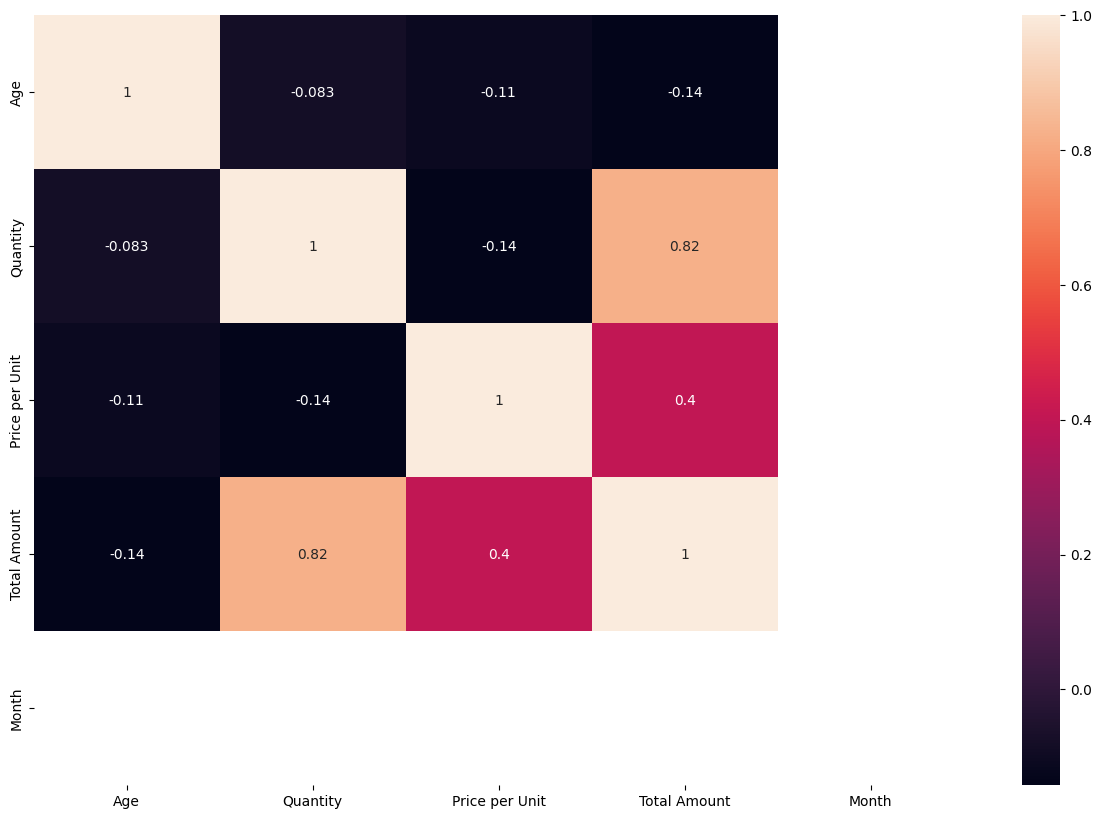

In [196]:
plt.figure(figsize=(15,10))
sns.heatmap(data.select_dtypes(include='number').corr(), annot=True)
plt.show()


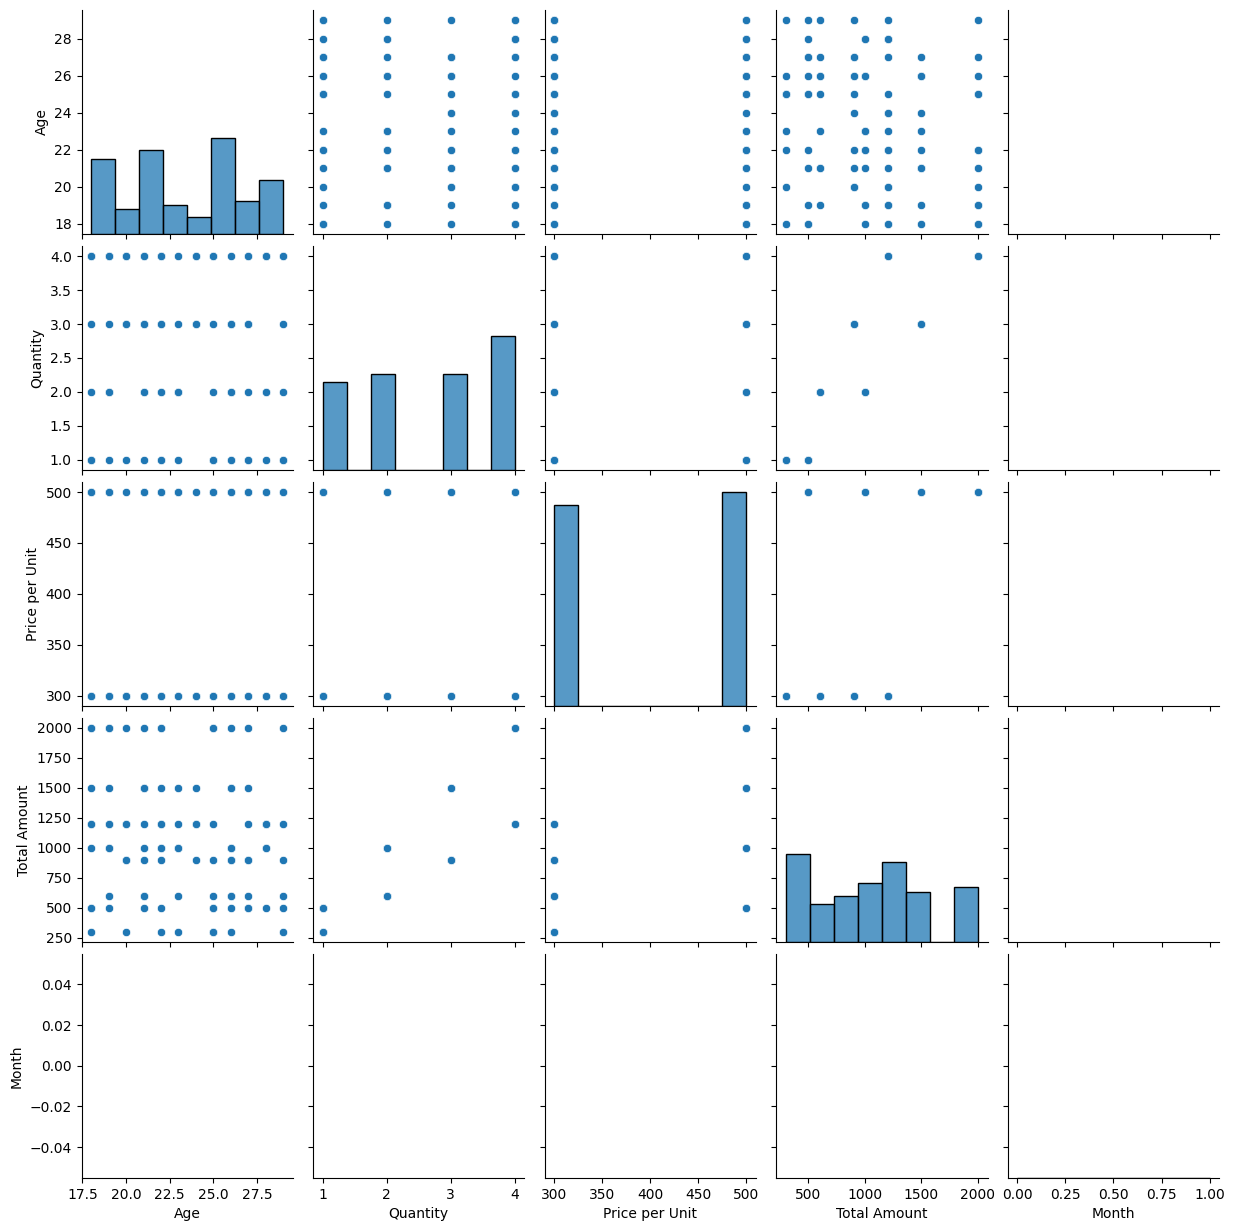

In [202]:
sns.pairplot(data)

Insight:

Strong positive correlation (0.85) → expensive items drive total sales.


In [204]:
#Trend analysis: average spending per age
age_trend = data.groupby("Age")["Total Amount"].mean().reset_index()
print("\n=== Avg Total Amount per Age ===")
pd.DataFrame(age_trend)


=== Avg Total Amount per Age ===


,Age,Total Amount
0,18.0,1133.333333
1,19.0,1222.222222
2,20.0,1083.333333
3,21.0,1130.000000
4,22.0,1160.000000
5,23.0,942.857143
6,24.0,1200.000000
7,25.0,860.000000
8,26.0,1023.076923
9,27.0,1012.500000


Insights:

Spending peaks in late 30s:

    Highest average: 37 years old → 743
    Ages 33–38 also show high spending (~600+):

Low spending at some ages:

    Ages 39, 41, 49, 52, 64 have low averages (~250–310)

No clear linear trend

Age alone is not a strong predictor of Total Amount

In [206]:
#Trend analysis: total revenue per month
data["Date"] = pd.to_datetime(data["Date"], errors='coerce')
data["Month"] = data["Date"].dt.to_period("M")

monthly_revenue = data.groupby("Month")["Total Amount"].sum().reset_index()
print("\n=== Monthly Revenue Trend ===")
pd.DataFrame(monthly_revenue)


=== Monthly Revenue Trend ===


,Month,Total Amount
0,2023-01,6600.0
1,2023-02,16000.0
2,2023-03,8800.0
3,2023-04,5200.0
4,2023-05,11200.0
5,2023-06,8200.0
6,2023-07,12300.0
7,2023-08,7300.0
8,2023-09,6700.0
9,2023-10,7900.0


Insights:

Revenue in 2023 is modest

    Monthly revenue mostly between ~5k–23k
    Highest in Jan 2023 → 23,125
    Lowest in Dec 2023 → 5,015

Downward trend into 2024

    Jan 2024 revenue = 1,530, showing a sharp drop after 2023.

Insights:

Revenue in 2023 is modest

    Monthly revenue mostly between ~5k–23k
    Highest in Jan 2023 → 23,125
    Lowest in Dec 2023 → 5,015

Downward trend into 2024

    Jan 2024 revenue = 1,530, showing a sharp drop after 2023.

In [94]:
print(data.columns)

Index(['Date', 'Gender', 'Age', 'Product Category', 'Quantity',
       'Price per Unit', 'Total Amount', 'Age_category', 'Month'],
      dtype='object')


In [96]:
monthly_revenue["Month"] = monthly_revenue["Month"].astype(str)

Saved: imperative_cleaned_data.csv
Saved: imperative_monthly_revenue.csv
Saved: imperative_age_trend.csv

Monthly revenue summary (imperative):
count       12.000000
mean      8733.333333
std       3382.396497
min       3700.000000
25%       6675.000000
50%       8050.000000
75%      10975.000000
max      16000.000000
Name: Total Amount, dtype: float64

Age trend summary (imperative):
count      12.000000
mean     1060.570564
std       114.778324
min       860.000000
25%       995.089286
50%      1063.095238
75%      1140.000000
max      1222.222222
Name: Total Amount, dtype: float64


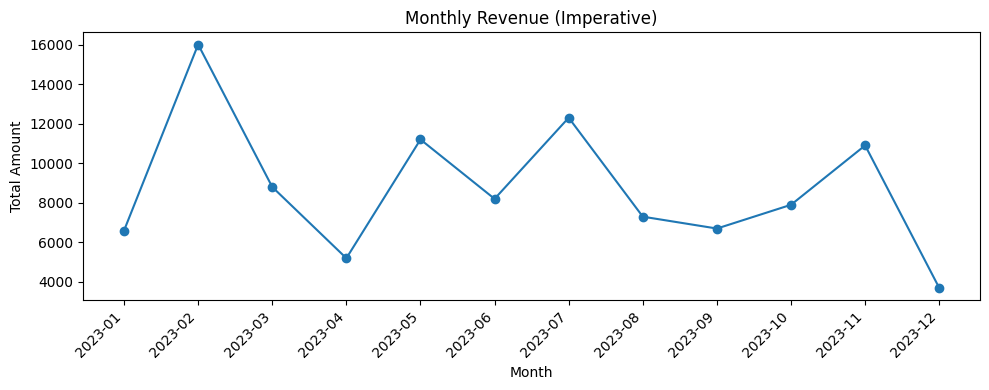

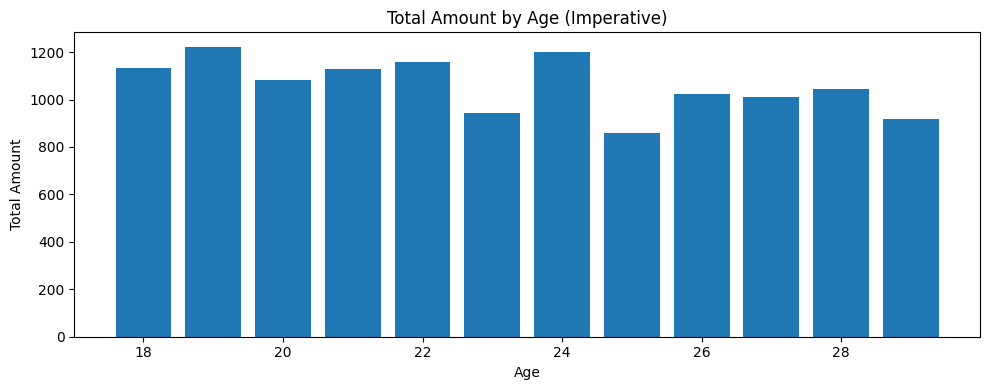

In [98]:
import matplotlib.pyplot as plt

data.to_csv("imperative_cleaned_data.csv", index=False)
print("Saved: imperative_cleaned_data.csv")

monthly_revenue.to_csv("imperative_monthly_revenue.csv", index=False)
age_trend.to_csv("imperative_age_trend.csv", index=False)
print("Saved: imperative_monthly_revenue.csv")
print("Saved: imperative_age_trend.csv")

print("\nMonthly revenue summary (imperative):")
print(monthly_revenue["Total Amount"].describe())

print("\nAge trend summary (imperative):")
print(age_trend["Total Amount"].describe())

monthly_revenue["Month"] = monthly_revenue["Month"].astype(str)

plt.figure(figsize=(10, 4))
plt.plot(
    monthly_revenue["Month"],
    monthly_revenue["Total Amount"],
    marker="o"
)
plt.title("Monthly Revenue (Imperative)")
plt.xlabel("Month")
plt.ylabel("Total Amount")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plt.bar(
    age_trend["Age"],
    age_trend["Total Amount"]
)
plt.title("Total Amount by Age (Imperative)")
plt.xlabel("Age")
plt.ylabel("Total Amount")
plt.tight_layout()

In [101]:
import csv

with open("impartive_processed_data.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(data.columns)   # Header
    for row in data.values:
        writer.writerow(row)
        
print("Export complete. File saved as impartive_processed_data.csv")
print(f"Rows exported: {len(data)}")

print("\n=== FILE CONTENT ===\n")

with open("impartive_processed_data.csv", "r") as file:
    reader = csv.reader(file)
    for line in reader:
        print(line)

Export complete. File saved as impartive_processed_data.csv
Rows exported: 99

=== FILE CONTENT ===

['Date', 'Gender', 'Age', 'Product Category', 'Quantity', 'Price per Unit', 'Total Amount', 'Age_category', 'Month']
['2023-02-27 00:00:00', 'Female', '26.0', 'Clothing', '2.0', '500.0', '1000.0', 'Young Adult', '2023-02']
['2023-08-05 00:00:00', 'Male', '22.0', 'Electronics', '3.0', '500.0', '1500.0', 'Teen', '2023-08']
['2023-10-07 00:00:00', 'Female', '28.0', 'Electronics', '2.0', '500.0', '1000.0', 'Young Adult', '2023-10']
['2023-02-17 00:00:00', 'Male', '22.0', 'Clothing', '3.0', '300.0', '900.0', 'Teen', '2023-02']
['2023-05-31 00:00:00', 'Female', '26.0', 'Clothing', '3.0', '300.0', '900.0', 'Young Adult', '2023-05']
['2023-11-13 00:00:00', 'Male', '18.0', 'Clothing', '4.0', '300.0', '1200.0', 'Teen', '2023-11']
['2023-02-10 00:00:00', 'Male', '25.0', 'Electronics', '1.0', '300.0', '300.0', 'Young Adult', '2023-02']
['2023-05-23 00:00:00', 'Female', '20.0', 'Electronics', '4.0',

In [103]:
import os
os.getcwd()

'C:\\Users\\hp\\concept project'